In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el CSV
df = pd.read_csv('data/eav 2024.csv')

/tmp/ipykernel_138296/1097753782.py:5: DtypeWarning: Columns (237,481) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/eav 2024.csv')


In [18]:
# Mapear valores numéricos a etiquetas
df['p79_3'] = df['p79_3'].map({0: 'no', 1: 'si', 8888: 'ns', 9999: 'nc'})

# Filtrar solo sí/no y agrupar por municipio
df_filtrado = df[df['p79_3'].isin(['si', 'no'])]
resultados = df_filtrado.groupby('nom_mun_mv')['p79_3'].value_counts().unstack().fillna(0)

In [20]:
# Calcular porcentaje de sí respecto al total (sí + no)
resultados['% Discriminacion'] = (resultados['si'] / (resultados['si'] + resultados['no'])) * 100

# Ordenar por porcentaje descendente y mostrar
resultados_ordenados = resultados.sort_values('% Discriminacion', ascending=True)
print(resultados_ordenados[['si', 'no', '% Discriminacion']].round(2))

p79_3                        si     no  % Discriminacion
nom_mun_mv                                              
Abasolo                     0.0    8.0              0.00
Agualeguas                  0.0    4.0              0.00
Los Ramones                 0.0    4.0              0.00
Aramberri                   0.0    8.0              0.00
Los Herreras                0.0    4.0              0.00
Doctor Arroyo               0.0   12.0              0.00
Iturbide                    1.0    7.0             12.50
Galeana                     3.0   13.0             18.75
China                       4.0   16.0             20.00
Mier y Noriega              1.0    3.0             25.00
Melchor Ocampo              1.0    3.0             25.00
General Zaragoza            2.0    6.0             25.00
General Treviño             1.0    3.0             25.00
Linares                    36.0   78.0             31.58
Guadalupe                 128.0  215.0             37.32
Mina                        3.0

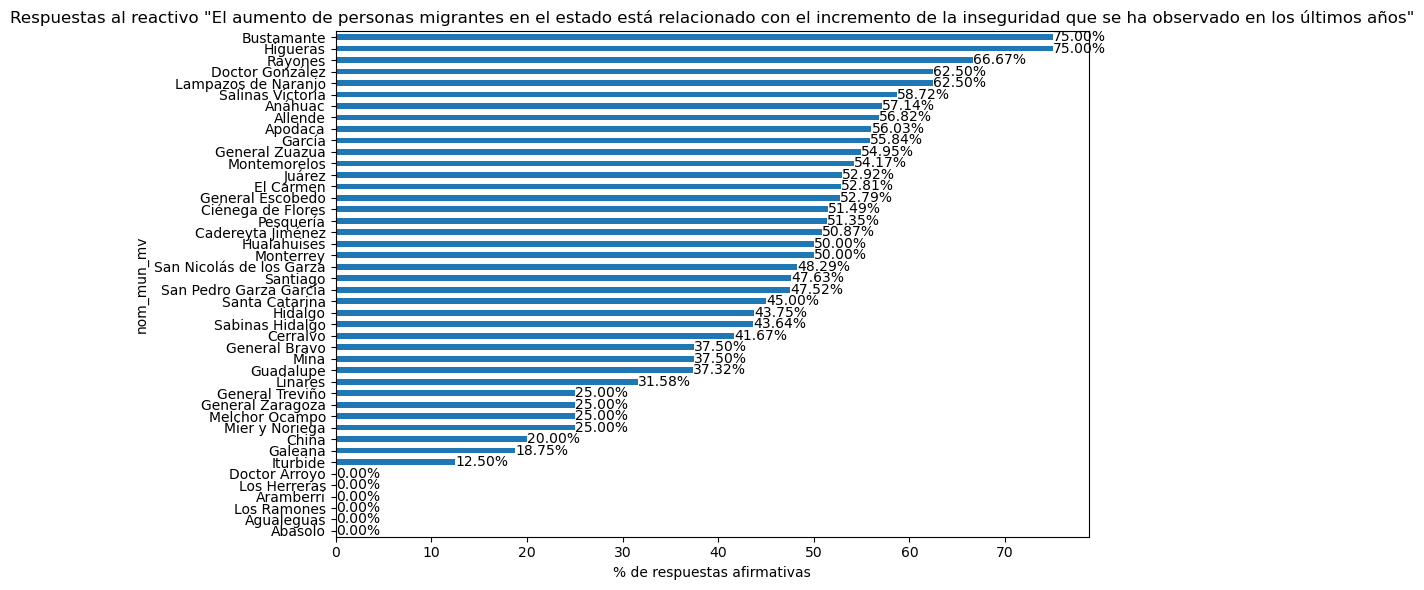

In [21]:
# Visualización
plt.figure(figsize=(10, 6))
resultados_ordenados['% Discriminacion'].plot(kind='barh', title='Respuestas al reactivo "El aumento de personas migrantes en el estado está relacionado con el incremento de la inseguridad que se ha observado en los últimos años"')
plt.xlabel('% de respuestas afirmativas')
for i, porcentaje in enumerate(resultados_ordenados['% Discriminacion']):
    plt.text(porcentaje, i, f"{porcentaje:.2f}%", ha='left', va='center')
plt.tight_layout()
plt.show()